# MNIST Classifier
The MNIST database (Modified National Institute of Standards and Technology database) is a large collection of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples.

#### GOAL: To build a classifier model that can learn to recognize these handwritten digits.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(7)

### Data Dimensions
(Independent Variables(X): Total number of Images and their resolution. <br>
Dependent Target(y): The Expected Digit in Integer format.

In [4]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Preview All Digit Images


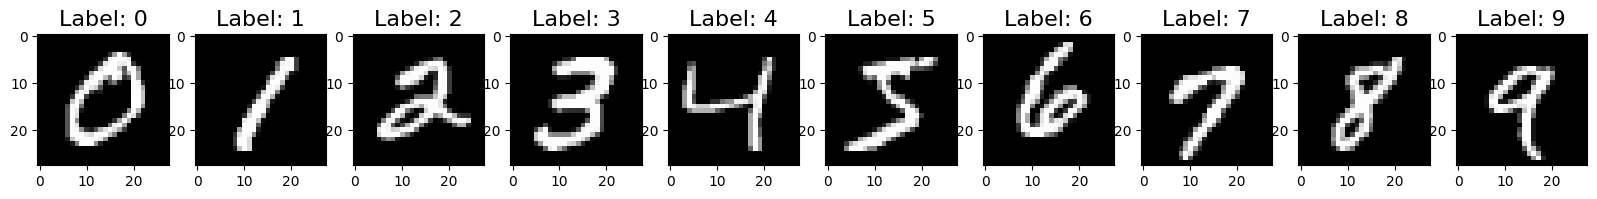

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

### Select a Single Class (In this case = 7)

In [6]:
selected_digit = 7

In [9]:
# Create binary labels - output 1 if 7, else 0
y_train_binary = (y_train == selected_digit).astype(int)
y_test_binary = (y_test == selected_digit).astype(int)
print("Converted Real valued output to Binary:")
print("{} => {}".format(y_train, y_train_binary))
print("{} => {}".format(y_test, y_test_binary))

Converted Real valued output to Binary:
[5 0 4 ... 5 6 8] => [0 0 0 ... 0 0 0]
[7 2 1 ... 4 5 6] => [1 0 0 ... 0 0 0]


### Data Normalization

In [10]:
# normalize the data to keep it in a certain range.
# in this case, since we have data which are RGB images
# the values range from 0-255, divide by 255 to get everything in the range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
# Reshape Data
# Flatten it from 28 x 28  => 28 x 28 in 1 dimension i.e. 784
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


### Create Neural Network model

In [12]:
model = Sequential() # Simple sequential neural network model

model.add(Dense(units=128, input_shape=(784,), activation='relu')) # input of 784 pixels
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25)) # 25% of our neurons are going to be deactivated during the training to prevent overfitting
model.add(Dense(units=1, activation='sigmoid')) # using sigmoid as output activation as it will predict values in between 0-1 which can be interpreted as probabilities

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # using binary crossentropy, as we only have 2 classes - is 7 or is not 7
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 117121 (457.50 KB)
Trainable params: 117121 (457.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the Model

In [13]:
model.fit(x=x_train, y=y_train_binary, batch_size=256, epochs=10)

Epoch 1/10
235/235 [==============================] - 3s 8ms/step - loss: 0.0650 - accuracy: 0.9775
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0245 - accuracy: 0.9925
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0164 - accuracy: 0.9952
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0121 - accuracy: 0.9964
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0084 - accuracy: 0.9975
Epoch 6/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 7/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0052 - accuracy: 0.9984
Epoch 8/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0037 - accuracy: 0.9988
Epoch 9/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0033 - accuracy: 0.9990
Epoch 10/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0022 - accuracy: 0.99

### Perform Inference & Evaluation

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test_binary)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 4ms/step - loss: 0.0237 - accuracy: 0.9950
Test Loss: 0.023717772215604782, Test Accuracy: 0.9950000047683716


In [35]:
y_pred = model.predict(x_test)
print(y_pred)
# prediction array displayed in scientific notation.
# So the first element 9.9999660e-01 when viewed as a real number is 0.99999660

313/313 [==============================] - 1s 4ms/step
[[9.9999660e-01]
 [4.9324212e-28]
 [4.9503697e-08]
 ...
 [1.3717508e-07]
 [2.2830743e-12]
 [1.1192680e-22]]


### In Class & Out of Class Sample - Textual Example

In [55]:
# As we can observe, that for the first image which is a 7, we get a value very close to 1
# we veryify that it is actually 7; i.e. our model was correct in classifying by checking
# the y_test_binary array which indicates 1(Yes, is selected class) as the first element and y_test real valued output array which indicates 7(Yes, our Selected Class) as the first element
# So our model does classify the test input correctly
print("Inclass Example:")
print(y_pred[0])
print(y_test_binary[0]) # Actual test output in binary
print(y_test[0]) # Actual test output

# We can observe that for the images which are not 7, we get binary output as 0 and predictions closer to 0:
print(y_pred[1])
print(y_test_binary[1]) # Actual test output in binary
print(y_test[1]) # Actual test output

print("Printing the actual binary & real valued output array:")
print(y_test_binary)
print(y_test)

Inclass Example:
[0.9999966]
1
7
[4.932421e-28]
0
2
Printing the actual binary & real valued output array:
[1 0 0 ... 0 0 0]
[7 2 1 ... 4 5 6]


### In Class & Out of Class Sample - Visual Example

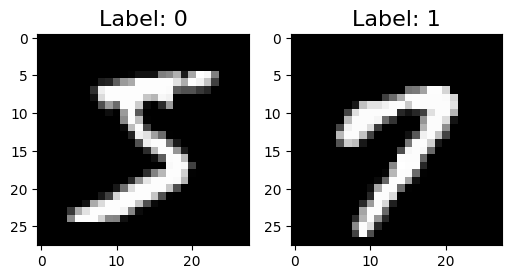

In [79]:
num_classes = 2
f, ax = plt.subplots(1, num_classes, figsize=(6, 6))
# print(x_train.shape)
# print(y_train_binary.shape)

for i in range(0, num_classes):
  # Find the index with all unique y_train_binary classes i.e. 0, 1
  index = np.where(y_train_binary == i)[0][0]
  sample = x_train[index]
  ax[i].imshow(sample.reshape(28, 28), cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

Summary: This model distinguishes images by identifying learned features during training. It recognizes distinctive characteristics of digit 7 for in-class samples, while for out-of-class samples, it discerns common features shared among other digits, separate from those unique to digit 7